# Libraries Overview

This notebook uses several essential libraries for image processing and comparison to detect tampering in images. Here’s an overview of each library and its purpose in this project:

### 1. `skimage.metrics` (Structural Similarity - SSIM)
- **Library**: `scikit-image`
- **Function**: `structural_similarity` (SSIM) is used to measure the similarity between two images, taking into account luminance, contrast, and structure. 
- **Usage**: It’s particularly helpful for detecting subtle differences between images, which is valuable in tampering or quality detection tasks.

### 2. `imutils`
- **Library**: `imutils`
- **Function**: Provides helper functions that simplify basic image processing tasks with OpenCV, such as resizing, rotating, and adjusting image orientation.
- **Usage**: By using `imutils`, we can streamline certain operations that would otherwise require additional code in OpenCV, making image processing more efficient.

### 3. `cv2` (OpenCV)
- **Library**: `OpenCV`
- **Function**: A comprehensive library for computer vision tasks that supports image and video processing, including reading, modifying, and analyzing images.
- **Usage**: Here, OpenCV works alongside `structural_similarity` to detect tampering by identifying visual differences in images, supporting tasks like feature extraction and image comparison.

### 4. `PIL` (Python Imaging Library) / `Pillow`
- **Library**: `Pillow` (an updated fork of `PIL`)
- **Function**: Enables image manipulation, such as loading, saving, and performing basic modifications on images.
- **Usage**: PIL/Pillow integrates well with other image libraries like OpenCV, allowing for simplified handling of different image formats and conversion tasks.

### 5. `requests`
- **Library**: `requests`
- **Function**: Allows sending HTTP requests in Python, commonly used for fetching data from online sources.
- **Usage**: In this project, `requests` can retrieve images from URLs, making it versatile for handling and processing images from remote sources with OpenCV or PIL.

Each of these libraries plays a specific role in the image tampering detection workflow, allowing for comprehensive image analysis and processing.


In [1]:
# import the necessary packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [2]:
# Open the image using PIL
original = Image.open( r"C:\Users\DELL\Desktop\cris@reallygreatsite.com.png")
tampered = Image.open( r"C:\Users\DELL\Desktop\cristiano.png")


In [4]:
# The file format of the source file.
print("Original image format : ",original.format) 
print("Tampered image format : ",tampered.format)

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Original image size : ",original.size) 
print("Tampered image size : ",tampered.size) 

Original image format :  PNG
Tampered image format :  PNG
Original image size :  (1011, 639)
Tampered image size :  (1011, 639)


In [6]:
# Resize Image
original = original.resize((250, 160))
print(original.size)
original.save(r"C:\Users\DELL\Desktop\DEEP_LEARNING\original.png")#Save image
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save(r"C:\Users\DELL\Desktop\DEEP_LEARNING\tampered.png")#Saves image

(250, 160)
(250, 160)


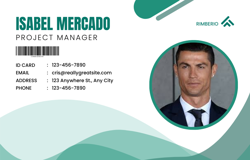

In [7]:
original

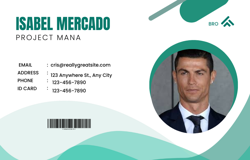

In [8]:
tampered

In [12]:
# load the two input images

original = cv2.imread(r"C:\Users\DELL\Desktop\DEEP_LEARNING\original.png")
tampered = cv2.imread(r"C:\Users\DELL\Desktop\DEEP_LEARNING\tampered.png")

#### Reading images using opencv.

In [14]:
# Convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

 Converting images into grayscale using opencv. Because in image processing many applications doesn't help us in identifying the important, edges of the coloured images also coloured images are bit complex to understand by machine beacuse they have 3 channel while grayscale has only 1 channel.  

In [15]:
# Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.6904821320660419


 Structural similarity index helps us to determine exactly where in terms of x,y coordinates location, the image differences are. Here, we are trying to find similarities between the original and tampered image. The lower the SSIM score lower is the similarity.

In [18]:
# Calculating threshold and contours 
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [19]:
# loop over the contours
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original Format Image


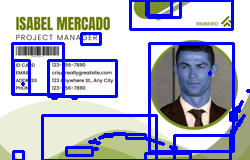

In [20]:
#Diplay original image with contour
print('Original Format Image')
Image.fromarray(original)

Tampered Image


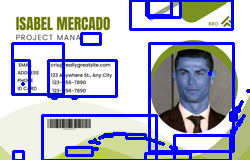

In [21]:
#Diplay tampered image with contour
print('Tampered Image')
Image.fromarray(tampered)

Different Image


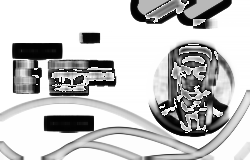

In [22]:
#Diplay difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


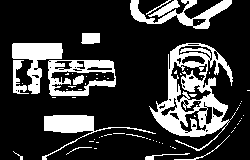

In [23]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)